In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

### Sparsity and selectivity and test accuracy in one graph

In [2]:
def test_val_extractor(file_name):    
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 1) % 4 == 0:
                line = ast.literal_eval(line)
                test_val_accumulator.append(line[-1])
    
    print("\ntest_val_accumulator: ", test_val_accumulator)
    return test_val_accumulator

In [3]:
def sparsity_val_extractor(file_name):
    sparsity_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 2) % 4 == 0:
                # extract certain format like X.XXX
                sparsity_list = re.findall("\d+\.\d+", line)
                # change to str type to use 'replace'
                sparsity_list = str(sparsity_list)
                # replace ' to none 
                sparsity_list = sparsity_list.replace("'", "")
                # use ast.literal_eval to change from str to list type
                sparsity_list = ast.literal_eval(sparsity_list)
                if not sparsity_list:
                    sparsity_accumulator.append(0)
                else:
                    sparsity_accumulator.append(sparsity_list[-1])
                
    
    
    for i, element in enumerate(sparsity_accumulator):
        if not 0 <= element <= 1:
            print(f"{i}-th element: error")
            sparsity_accumulator[i] = 0
    
    print("\nsparsity_accumulator: ", sparsity_accumulator)
    return sparsity_accumulator

In [4]:
def selectivity_val_extractor(file_name):
    selectivity_average_accumulator = list()
    selectivity_std_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if (i - 2) % 5 == 0:
                selectivity_average = ast.literal_eval(line)
                selectivity_average_accumulator.append(selectivity_average)
            if (i - 3) % 5 == 0:
                selectivity_std = ast.literal_eval(line)
                selectivity_std_accumulator.append(selectivity_std)
    
    print("\nselectivity_average_accumulator: ", selectivity_average_accumulator)
    print("\nselectivity_std_accumulator: ", selectivity_std_accumulator)
    return selectivity_average_accumulator, selectivity_std_accumulator

In [5]:
def all_plotter(__list__, test_acc_list, sparsity_list, selectivity_average_list, selectivity_std_list, location='best'):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(__list__, test_acc_list, marker='s', label='test accuracy', c='r')
    ax.plot(__list__, sparsity_list, marker='v', label='sparsity', c='g')
    ax.errorbar(__list__, selectivity_average_list, selectivity_std_list, marker='^', label='selectivity', c='b')
    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location)
    plt.show()

In [6]:
rho_list = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
betas_lhs = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
betas_rhs = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
learning_rate = np.logspace(-5, 1, 11)
weight_decay = np.logspace(-5, 1, 11)
momentum = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Adadelta

## learning rate


test_val_accumulator:  [0.1016, 0.2061, 0.3967, 0.6266, 0.7711, 0.8712, 0.9078, 0.9323, 0.9609, 0.9775, 0.9816]

sparsity_accumulator:  [0.005, 0.0051, 0.0058, 0.0109, 0.0405, 0.0851, 0.107, 0.1247, 0.18, 0.223, 0.3406]

selectivity_average_accumulator:  [0.029920824483668652, 0.03046706846178009, 0.04317893718275562, 0.11472607529534781, 0.20893355011385525, 0.23639389857815235, 0.25240237377303687, 0.2794081684519076, 0.3697536280691663, 0.5155289895687379, 0.6568011201367641]

selectivity_std_accumulator:  [0.011175631289007112, 0.011900280731635881, 0.01619138137320755, 0.03784762639694103, 0.06435427840686293, 0.09046648282640803, 0.13065947352524138, 0.17310978430744373, 0.18034812519728427, 0.15729215274694652, 0.16435870601413452]


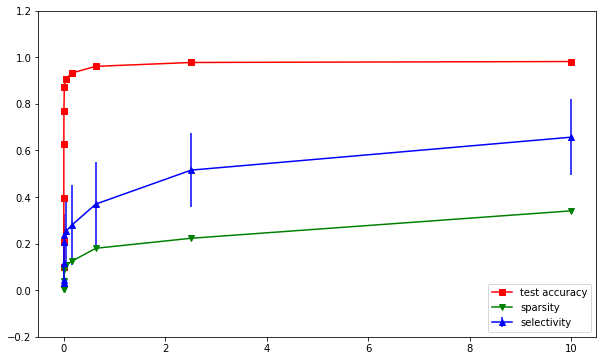

In [7]:
test_vals  = test_val_extractor('sparsity_adadelta_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_adadelta_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adadelta_learning_rate.txt")

all_plotter(learning_rate, test_vals, sparsities, selectivity_average, selectivity_std, 'lower right')

## rho


test_val_accumulator:  [0.979, 0.9794, 0.9806, 0.9802, 0.9814, 0.9796, 0.9814, 0.9818, 0.9811, 0.9805, 0.9781]

sparsity_accumulator:  [0.2506, 0.2286, 0.218, 0.2238, 0.2406, 0.2317, 0.2724, 0.2789, 0.2932, 0.3229, 0.612]

selectivity_average_accumulator:  [0.32538553057227704, 0.2957938401792709, 0.2925926142568357, 0.2990244997122229, 0.3187995606582873, 0.3054916782366132, 0.34724519336903703, 0.3516578968761497, 0.36361793229414213, 0.40188000738159935, 0.5663960144088669]

selectivity_std_accumulator:  [0.20736523853694072, 0.2098907734279308, 0.213070659496437, 0.20737907456246304, 0.2065107290663925, 0.19855869961262052, 0.1973508746288204, 0.18679359396850606, 0.1779797664676398, 0.16566182619098682, 0.15162601839281234]


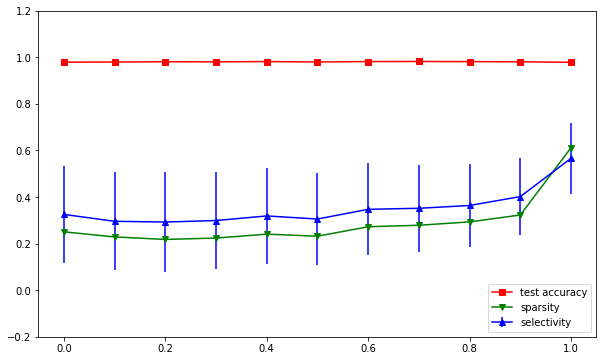

In [8]:
test_vals  = test_val_extractor('sparsity_adadelta_rho.txt')
sparsities = sparsity_val_extractor('sparsity_adadelta_rho.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adadelta_rho.txt")

all_plotter(rho_list, test_vals, sparsities, selectivity_average, selectivity_std, 'lower right')

## weight decay


test_val_accumulator:  [0.9822, 0.9808, 0.9757, 0.9602, 0.9132, 0.8778, 0.7251, 0.098, 0.1032, 0.101, 0.0892]
7-th element: error
8-th element: error

sparsity_accumulator:  [0.3112, 0.2945, 0.2729, 0.1903, 0.1111, 0.0712, 0.0362, 0, 0, 0.0085, 0.0708]

selectivity_average_accumulator:  [0.387458606093252, 0.379345391583166, 0.3388284395742854, 0.2764012512539832, 0.2667204321883134, 0.2064022914353626, 0.14581236763004168, 0.0021188362973671715, 0.0014498741636987387, 0.05335541829276051, 0.1534267932877817]

selectivity_std_accumulator:  [0.15907799035844444, 0.16484598899846492, 0.17387645871689208, 0.1710684037514141, 0.11372112370375675, 0.08825141159755291, 0.05205654210499923, 1.3618238547516405e-09, 2.168404344971009e-19, 0.020672366947616122, 0.06876527599615102]


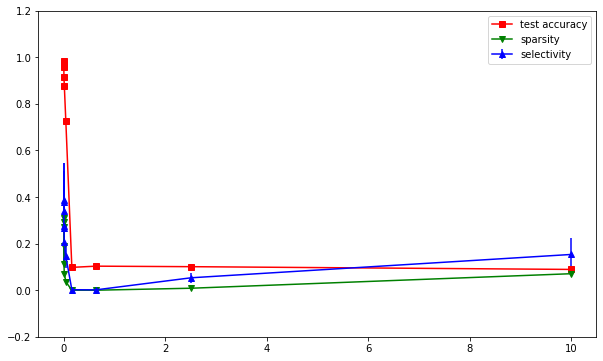

In [9]:
test_vals  = test_val_extractor('sparsity_adadelta_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_adadelta_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adadelta_weight_decay.txt")

all_plotter(weight_decay, test_vals, sparsities, selectivity_average, selectivity_std, 'upper right')

## weight decay closer look


test_val_accumulator:  [0.9822, 0.9808, 0.9757, 0.9602, 0.9132, 0.8778, 0.7251, 0.098, 0.1032, 0.101, 0.0892]
7-th element: error
8-th element: error

sparsity_accumulator:  [0.3112, 0.2945, 0.2729, 0.1903, 0.1111, 0.0712, 0.0362, 0, 0, 0.0085, 0.0708]

selectivity_average_accumulator:  [0.387458606093252, 0.379345391583166, 0.3388284395742854, 0.2764012512539832, 0.2667204321883134, 0.2064022914353626, 0.14581236763004168, 0.0021188362973671715, 0.0014498741636987387, 0.05335541829276051, 0.1534267932877817]

selectivity_std_accumulator:  [0.15907799035844444, 0.16484598899846492, 0.17387645871689208, 0.1710684037514141, 0.11372112370375675, 0.08825141159755291, 0.05205654210499923, 1.3618238547516405e-09, 2.168404344971009e-19, 0.020672366947616122, 0.06876527599615102]


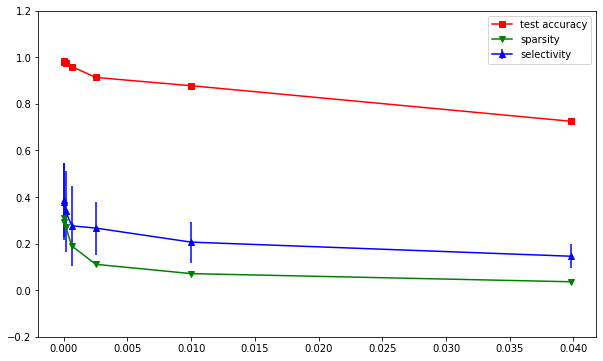

In [10]:
test_vals  = test_val_extractor('sparsity_adadelta_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_adadelta_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adadelta_weight_decay.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_selectivity_average = selectivity_average.copy()
new_selectivity_std = selectivity_std.copy()
new_weight_decay = weight_decay.copy()

new_test_vals = new_test_vals[:-4]
new_sparsities = new_sparsities[:-4]
new_selectivity_average = new_selectivity_average[:-4]
new_selectivity_std = new_selectivity_std[:-4]
new_weight_decay = new_weight_decay[:-4]

all_plotter(new_weight_decay, new_test_vals, new_sparsities, new_selectivity_average, new_selectivity_std, 'upper right')

# Adagrad

## learning rate


test_val_accumulator:  [0.46, 0.7008, 0.7901, 0.8666, 0.9125, 0.9379, 0.9644, 0.981, 0.9813, 0.9712, 0.9647]

sparsity_accumulator:  [0.0067, 0.0135, 0.0498, 0.1143, 0.1551, 0.1828, 0.2384, 0.358, 0.5731, 0.7678, 0.7178]

selectivity_average_accumulator:  [0.0398359279523026, 0.08964068286074822, 0.21323167078976152, 0.27828052401996783, 0.3066073551695825, 0.35478835194012065, 0.5190714679254544, 0.7235626377843205, 0.7213649543173327, 0.8394429916435525]

selectivity_std_accumulator:  [0.01453447750092088, 0.02579428954623502, 0.05886453831016201, 0.08680054668234716, 0.1265934427551766, 0.16868064800078386, 0.16324804614996136, 0.16601419696941955, 0.32853560912638013, 0.28700328797268465]

learning_rate_1 [1.00000000e-05 3.98107171e-05 1.58489319e-04 6.30957344e-04
 2.51188643e-03 1.00000000e-02 3.98107171e-02 1.58489319e-01
 6.30957344e-01 2.51188643e+00 1.00000000e+01]

learning_rate_1 [1.00000000e-05 3.98107171e-05 1.58489319e-04 6.30957344e-04
 2.51188643e-03 1.00000000e-02 3.

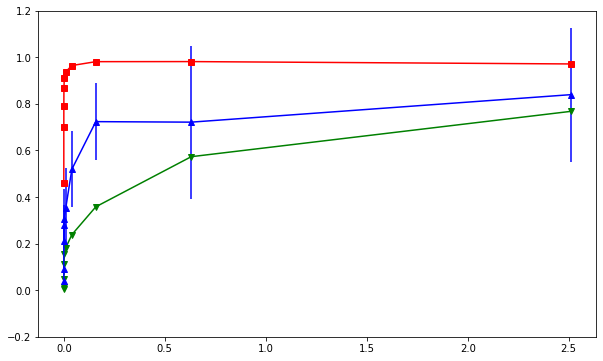

In [23]:
test_vals  = test_val_extractor('sparsity_adagrad_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_adagrad_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adagrad_learning_rate.txt")

learning_rate_1 = np.logspace(-5, 1, 11)
print("\nlearning_rate_1", learning_rate_1)
learning_rate_1 = learning_rate_1[:10]
print("\nlearning_rate_1", learning_rate_1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(learning_rate_1, test_vals[:10], marker='s', label='test accuracy', c='r')
ax.plot(learning_rate_1, sparsities[:10], marker='v', label='sparsity', c='g')
ax.errorbar(learning_rate_1, selectivity_average[:10], selectivity_std[:10], marker='^', label='selectivity', c='b')
ax.set_ylim([-0.2,1.2])
plt.show()

## weight decay


test_val_accumulator:  [0.9643, 0.9632, 0.96, 0.9442, 0.917, 0.8933, 0.7941, 0.1135, 0.1135, 0.1032, 0.101]
7-th element: error
8-th element: error
9-th element: error
10-th element: error

sparsity_accumulator:  [0.223, 0.2137, 0.1839, 0.1246, 0.0708, 0.0511, 0.0303, 0, 0, 0, 0]

selectivity_average_accumulator:  [0.33996340100293165, 0.33136160160251504, 0.30882061707627306, 0.24811695222381644, 0.18867470421494942, 0.16436565885333793, 0.13118931468461892, 0.001537111633300981, 0.00026033000362239147, 4.293309030383215e-05, 5.406724348495389e-06]

selectivity_std_accumulator:  [0.16236318664636223, 0.15283746424428943, 0.14904520073615557, 0.1271422653955837, 0.0795400430217516, 0.05936656123187247, 0.043026971498720715, 0.00011829432986065786, 3.31008541698502e-06, 2.9265323941863827e-06, 1.714799807892261e-07]


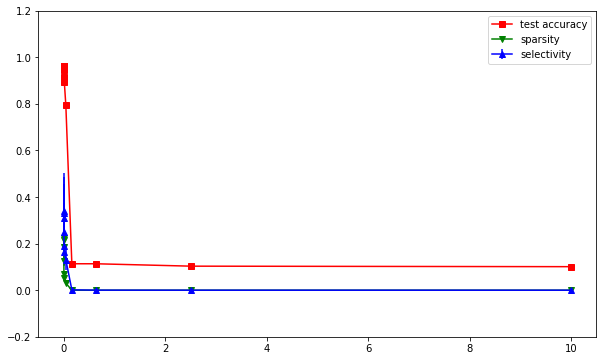

In [24]:
test_vals  = test_val_extractor('sparsity_adagrad_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_adagrad_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adagrad_weight_decay.txt")

all_plotter(weight_decay, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## weight decay closer look


test_val_accumulator:  [0.9643, 0.9632, 0.96, 0.9442, 0.917, 0.8933, 0.7941, 0.1135, 0.1135, 0.1032, 0.101]
7-th element: error
8-th element: error
9-th element: error
10-th element: error

sparsity_accumulator:  [0.223, 0.2137, 0.1839, 0.1246, 0.0708, 0.0511, 0.0303, 0, 0, 0, 0]

selectivity_average_accumulator:  [0.33996340100293165, 0.33136160160251504, 0.30882061707627306, 0.24811695222381644, 0.18867470421494942, 0.16436565885333793, 0.13118931468461892, 0.001537111633300981, 0.00026033000362239147, 4.293309030383215e-05, 5.406724348495389e-06]

selectivity_std_accumulator:  [0.16236318664636223, 0.15283746424428943, 0.14904520073615557, 0.1271422653955837, 0.0795400430217516, 0.05936656123187247, 0.043026971498720715, 0.00011829432986065786, 3.31008541698502e-06, 2.9265323941863827e-06, 1.714799807892261e-07]


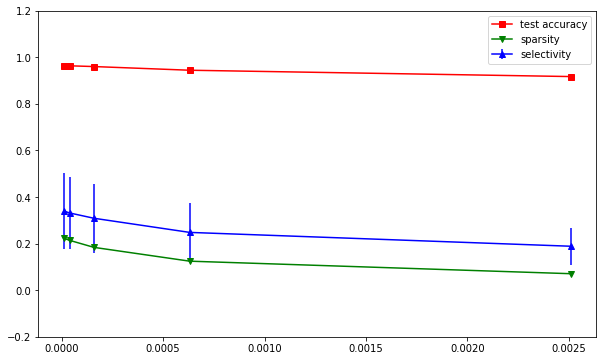

In [25]:
test_vals  = test_val_extractor('sparsity_adagrad_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_adagrad_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_adagrad_weight_decay.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_selectivity_average = selectivity_average.copy()
new_selectivity_std = selectivity_std.copy()
new_weight_decay = weight_decay.copy()

new_test_vals = new_test_vals[:-6]
new_sparsities = new_sparsities[:-6]
new_selectivity_average = new_selectivity_average[:-6]
new_selectivity_std = new_selectivity_std[:-6]
new_weight_decay = new_weight_decay[:-6]

all_plotter(new_weight_decay, new_test_vals, new_sparsities, new_selectivity_average, new_selectivity_std, 'best')

# Adam

## betas lhs


test_val_accumulator:  [0.9816, 0.9793, 0.9801, 0.9821, 0.9793, 0.9799, 0.9804, 0.9804, 0.9813]

sparsity_accumulator:  [0.289, 0.2982, 0.2955, 0.2941, 0.3059, 0.3064, 0.292, 0.2918, 0.2908]

selectivity_average_accumulator:  [0.38541991041729307, 0.3857602847012982, 0.38011045565931145, 0.3798536753754879, 0.3784516056719871, 0.3720024467730436, 0.3833080331845863, 0.37321861599493816, 0.3882907440846222]

selectivity_std_accumulator:  [0.16642415479883457, 0.17353551270611373, 0.17262314546374766, 0.16827379626026834, 0.1633492000729735, 0.1714419885049513, 0.1705962390145244, 0.1796800354807016, 0.1778509028157246]


ValueError: x and y must have same first dimension, but have shapes (11,) and (9,)

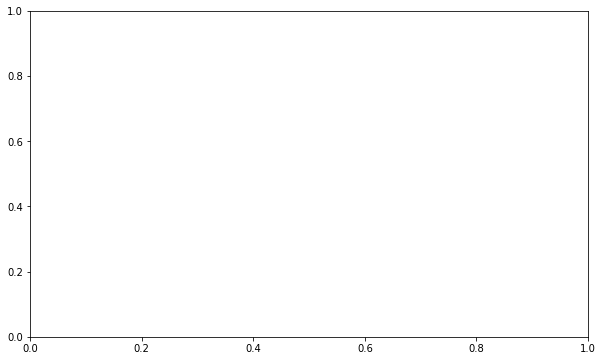

In [27]:
test_vals  = test_val_extractor('sparsity_Adam_betas_lhs.txt')
sparsities = sparsity_val_extractor('sparsity_Adam_betas_lhs.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_Adam_betas_lhs.txt")

all_plotter(betas_lhs, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## betas rhs 재검토 필요


test_val_accumulator:  [0.018, 0.1158, 0.0975, 0.0997, 0.9247, 0.9553, 0.9637, 0.9768, 0.9791, 0.9798, 0.9812]

sparsity_accumulator:  [0.4184, 0.3803, 0.2751, 0.4593, 0.4915, 0.474, 0.4309, 0.3199, 0.272, 0.2939, 0.3033]

selectivity_average_accumulator:  [0.3724461465778249, 0.34952480368628264, 0.3629210107326583, 0.3899284327989667]

selectivity_std_accumulator:  [0.19357087985958346, 0.16975783535848354, 0.17127270175402293, 0.16745573688038567]


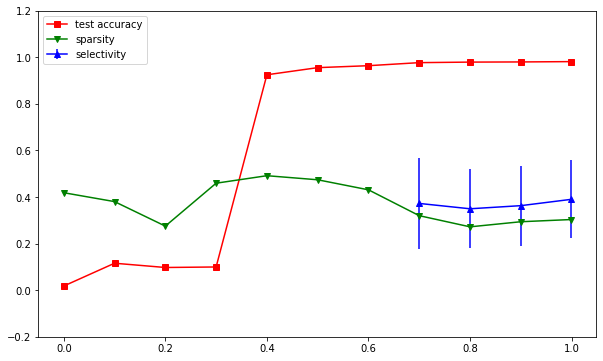

In [44]:
test_vals  = test_val_extractor('sparsity_Adam_betas_rhs.txt')
sparsities = sparsity_val_extractor('sparsity_Adam_betas_rhs.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_Adam_betas_rhs.txt")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(betas_rhs, test_vals, marker='s', label='test accuracy', c='r')
ax.plot(betas_rhs, sparsities, marker='v', label='sparsity', c='g')
ax.errorbar(betas_rhs[7:], selectivity_average, selectivity_std, marker='^', label='selectivity', c='b')
ax.set_ylim([-0.2,1.2])
ax.legend()
plt.show()

## learning rate 


test_val_accumulator:  [0.9126, 0.9388, 0.9657, 0.9791, 0.9794, 0.9793, 0.9732, 0.961, 0.9241, 0.8727, 0.7531]

sparsity_accumulator:  [0.1513, 0.1776, 0.2087, 0.2531, 0.2958, 0.3913, 0.5894, 0.6501, 0.8154, 0.8788, 0.6726]

selectivity_average_accumulator:  [0.2816258581857495, 0.3045342438215235, 0.3188239665404453, 0.3390042853603443, 0.37157181512808346, 0.481391620556515, 0.6465374728567745, 0.7236853898431995]

selectivity_std_accumulator:  [0.09639766502769052, 0.12990577151200916, 0.16263330363573505, 0.16487643872961175, 0.16509042108956729, 0.1973231591118662, 0.23390883099393642, 0.30898804755758985]


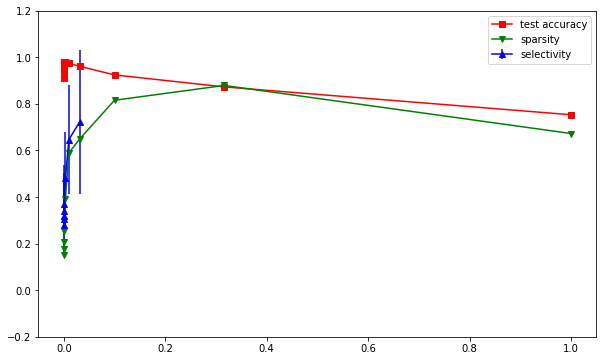

In [50]:
test_vals  = test_val_extractor('sparsity_Adam_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_Adam_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_Adam_learning_rate.txt")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(learning_rate, test_vals, marker='s', label='test accuracy', c='r')
ax.plot(learning_rate, sparsities, marker='v', label='sparsity', c='g')
ax.errorbar(learning_rate[:-3], selectivity_average, selectivity_std, marker='^', label='selectivity', c='b')
ax.set_ylim([-0.2,1.2])
ax.legend()
plt.show()

## learning rate closer look


test_val_accumulator:  [0.9126, 0.9388, 0.9657, 0.9791, 0.9794, 0.9793, 0.9732, 0.961, 0.9241, 0.8727, 0.7531]

sparsity_accumulator:  [0.1513, 0.1776, 0.2087, 0.2531, 0.2958, 0.3913, 0.5894, 0.6501, 0.8154, 0.8788, 0.6726]

selectivity_average_accumulator:  [0.2816258581857495, 0.3045342438215235, 0.3188239665404453, 0.3390042853603443, 0.37157181512808346, 0.481391620556515, 0.6465374728567745, 0.7236853898431995]

selectivity_std_accumulator:  [0.09639766502769052, 0.12990577151200916, 0.16263330363573505, 0.16487643872961175, 0.16509042108956729, 0.1973231591118662, 0.23390883099393642, 0.30898804755758985]


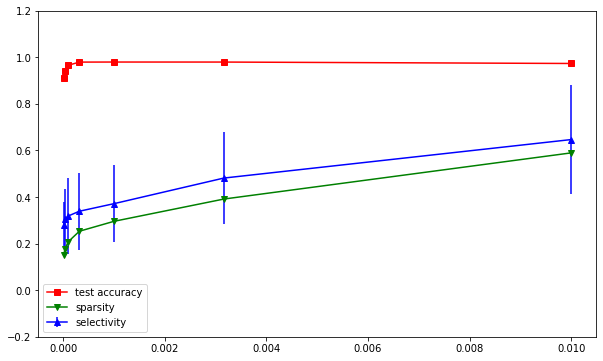

In [63]:
test_vals  = test_val_extractor('sparsity_Adam_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_Adam_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_Adam_learning_rate.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_learning_rate = learning_rate.copy()

new_test_vals = new_test_vals[:-4]
new_sparsities = new_sparsities[:-4]
new_learning_rate = new_learning_rate[:-4]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(new_learning_rate, new_test_vals, marker='s', label='test accuracy', c='r')
ax.plot(new_learning_rate, new_sparsities, marker='v', label='sparsity', c='g')
ax.errorbar(new_learning_rate, selectivity_average[:-1], selectivity_std[:-1], marker='^', label='selectivity', c='b')
ax.set_ylim([-0.2,1.2])
ax.legend()
plt.show()

## weight decay


test_val_accumulator:  [0.9838, 0.9809, 0.974, 0.9576, 0.9244, 0.8857, 0.7426, 0.1135, 0.1009, 0.098, 0.1135]
7-th element: error
8-th element: error
9-th element: error
10-th element: error

sparsity_accumulator:  [0.272, 0.2548, 0.2493, 0.1568, 0.0834, 0.0632, 0.0344, 0, 0, 0, 0]

selectivity_average_accumulator:  [0.35987427142595085, 0.34429686822908523, 0.31348291778875037, 0.23403189446696368, 0.20263300846000748, 0.17718719427939675, 0.1349916276500025, 0.005215641262412451, 0.0006157072079631072, 0.00022161581016162945, 7.008529176863584e-05]

selectivity_std_accumulator:  [0.17517359965876553, 0.1717037511235813, 0.1763550896660668, 0.1759541617121554, 0.11617569732423047, 0.0835595447460851, 0.049748314862314486, 7.496105233820335e-09, 1.6569244996873862e-08, 9.230410235675863e-08, 1.0873404229742434e-06]


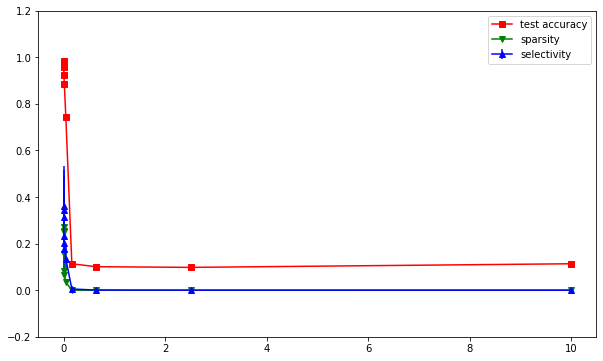

In [52]:
test_vals  = test_val_extractor('sparsity_Adam_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_Adam_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_Adam_weight_decay.txt")

all_plotter(weight_decay, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## weight decay closer look


test_val_accumulator:  [0.9838, 0.9809, 0.974, 0.9576, 0.9244, 0.8857, 0.7426, 0.1135, 0.1009, 0.098, 0.1135]
7-th element: error
8-th element: error
9-th element: error
10-th element: error

sparsity_accumulator:  [0.272, 0.2548, 0.2493, 0.1568, 0.0834, 0.0632, 0.0344, 0, 0, 0, 0]

selectivity_average_accumulator:  [0.35987427142595085, 0.34429686822908523, 0.31348291778875037, 0.23403189446696368, 0.20263300846000748, 0.17718719427939675, 0.1349916276500025, 0.005215641262412451, 0.0006157072079631072, 0.00022161581016162945, 7.008529176863584e-05]

selectivity_std_accumulator:  [0.17517359965876553, 0.1717037511235813, 0.1763550896660668, 0.1759541617121554, 0.11617569732423047, 0.0835595447460851, 0.049748314862314486, 7.496105233820335e-09, 1.6569244996873862e-08, 9.230410235675863e-08, 1.0873404229742434e-06]


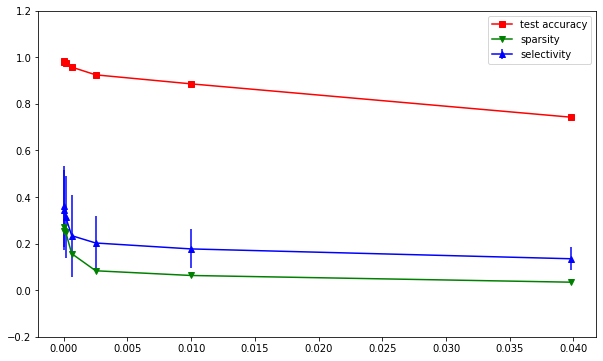

In [55]:
test_vals  = test_val_extractor('sparsity_Adam_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_Adam_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_Adam_weight_decay.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_selectivity_average = selectivity_average.copy()
new_selectivity_std = selectivity_std.copy()
new_weight_decay = weight_decay.copy()

new_test_vals = new_test_vals[:-4]
new_sparsities = new_sparsities[:-4]
new_selectivity_average = new_selectivity_average[:-4]
new_selectivity_std = new_selectivity_std[:-4]
new_weight_decay = new_weight_decay[:-4]

all_plotter(new_weight_decay, new_test_vals, new_sparsities, new_selectivity_average, new_selectivity_std, 'best')

# SGD

## learning rate


test_val_accumulator:  [0.1318, 0.1938, 0.4949, 0.6988, 0.8475, 0.8984, 0.9206, 0.9442, 0.971, 0.9802, 0.9818]

sparsity_accumulator:  [0.005, 0.005, 0.006, 0.0157, 0.0501, 0.0747, 0.0925, 0.1448, 0.2265, 0.3638, 0.5598]

selectivity_average_accumulator:  [0.02979703811815038, 0.0312952577334564, 0.03840530546107897, 0.08484075098232759, 0.17174381411484246, 0.20522805208235884, 0.22276360892245017, 0.26557170685689485, 0.32512399282449705, 0.4545307163142242, 0.5294185973594568]

selectivity_std_accumulator:  [0.011651478036640104, 0.012557997852348013, 0.014372602450562245, 0.03350851837237391, 0.0611439266889113, 0.07158532263141593, 0.0914442998084054, 0.13274207546571232, 0.16458277185902115, 0.1590065946317223, 0.1474781580575302]


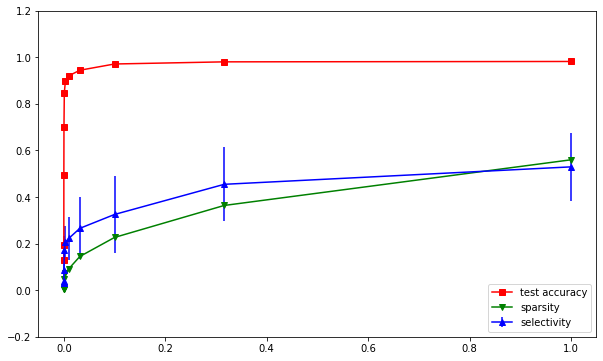

In [57]:
test_vals  = test_val_extractor('sparsity_SGD_learning_rate.txt')
sparsities = sparsity_val_extractor('sparsity_SGD_learning_rate.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_SGD_learning_rate.txt")

all_plotter(learning_rate, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## weight decay


test_val_accumulator:  [0.9698, 0.97, 0.9673, 0.955, 0.9237, 0.8928, 0.7765, 0.1028, 0.1028, 0.0958, 0.098]
7-th element: error

sparsity_accumulator:  [0.2207, 0.2242, 0.1937, 0.1274, 0.08, 0.0612, 0.0341, 0, 0, 0, 0]

selectivity_average_accumulator:  [0.31883971969294267, 0.3231004271224839, 0.30024042276976315, 0.24722219983149546, 0.2155715579507877, 0.18768344730533904, 0.14262774224025168, 0.004478568439128996, 0.001015282655055799, 0.000173591932718859, 0.00011565416872329574]

selectivity_std_accumulator:  [0.16442941266897024, 0.1645112409906266, 0.15096871122535993, 0.13002137486870585, 0.09633115372456397, 0.08304640637325611, 0.049497860265281836, 2.2905429761103816e-10, 2.168404344971009e-19, 0.0, 1.3552527156068805e-20]


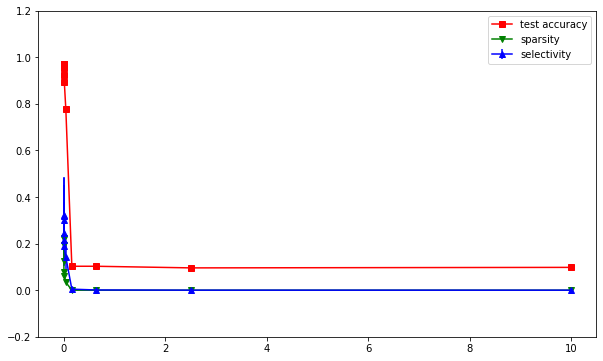

In [58]:
test_vals  = test_val_extractor('sparsity_SGD_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_SGD_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_SGD_weight_decay.txt")

all_plotter(weight_decay, test_vals, sparsities, selectivity_average, selectivity_std, 'best')

## weight decay closer look


test_val_accumulator:  [0.9698, 0.97, 0.9673, 0.955, 0.9237, 0.8928, 0.7765, 0.1028, 0.1028, 0.0958, 0.098]
7-th element: error

sparsity_accumulator:  [0.2207, 0.2242, 0.1937, 0.1274, 0.08, 0.0612, 0.0341, 0, 0, 0, 0]

selectivity_average_accumulator:  [0.31883971969294267, 0.3231004271224839, 0.30024042276976315, 0.24722219983149546, 0.2155715579507877, 0.18768344730533904, 0.14262774224025168, 0.004478568439128996, 0.001015282655055799, 0.000173591932718859, 0.00011565416872329574]

selectivity_std_accumulator:  [0.16442941266897024, 0.1645112409906266, 0.15096871122535993, 0.13002137486870585, 0.09633115372456397, 0.08304640637325611, 0.049497860265281836, 2.2905429761103816e-10, 2.168404344971009e-19, 0.0, 1.3552527156068805e-20]


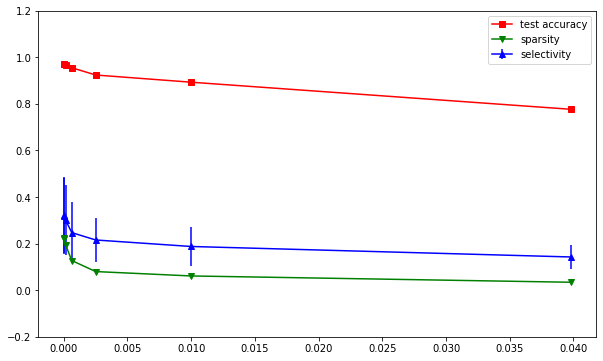

In [59]:
test_vals  = test_val_extractor('sparsity_SGD_weight_decay.txt')
sparsities = sparsity_val_extractor('sparsity_SGD_weight_decay.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_SGD_weight_decay.txt")

# modification 
new_test_vals = test_vals.copy()
new_sparsities = sparsities.copy()
new_selectivity_average = selectivity_average.copy()
new_selectivity_std = selectivity_std.copy()
new_weight_decay = weight_decay.copy()

new_test_vals = new_test_vals[:-4]
new_sparsities = new_sparsities[:-4]
new_selectivity_average = new_selectivity_average[:-4]
new_selectivity_std = new_selectivity_std[:-4]
new_weight_decay = new_weight_decay[:-4]

all_plotter(new_weight_decay, new_test_vals, new_sparsities, new_selectivity_average, new_selectivity_std, 'best')

## momentum


test_val_accumulator:  [0.9706, 0.9723, 0.9741, 0.9769, 0.977, 0.9783, 0.9781, 0.9814, 0.9814, 0.9825]

sparsity_accumulator:  [0.2302, 0.2392, 0.2391, 0.2519, 0.2723, 0.2885, 0.3279, 0.3455, 0.3804, 0.456]

selectivity_average_accumulator:  [0.3253374827140844, 0.3352083249955381, 0.3348733284636255, 0.3471083041287948, 0.36303648854648113, 0.3768636849048064, 0.4160833079363878, 0.43732497743028764, 0.4697294414112504, 0.5257762694269861]

selectivity_std_accumulator:  [0.16709186370831447, 0.1731467259939569, 0.17604645191259227, 0.1745362095816284, 0.16650997700589473, 0.1565938896779712, 0.15834322112048008, 0.15116067041877967, 0.14564340498131315, 0.1438849457010867]


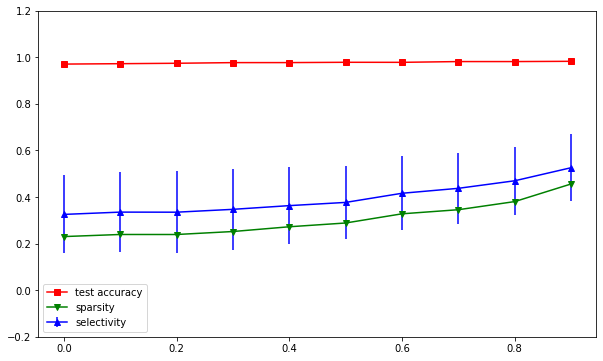

In [60]:
test_vals  = test_val_extractor('sparsity_SGD_momentum.txt')
sparsities = sparsity_val_extractor('sparsity_SGD_momentum.txt')
selectivity_average, selectivity_std = selectivity_val_extractor("selectivity_SGD_momentum.txt")

all_plotter(momentum, test_vals, sparsities, selectivity_average, selectivity_std, 'best')